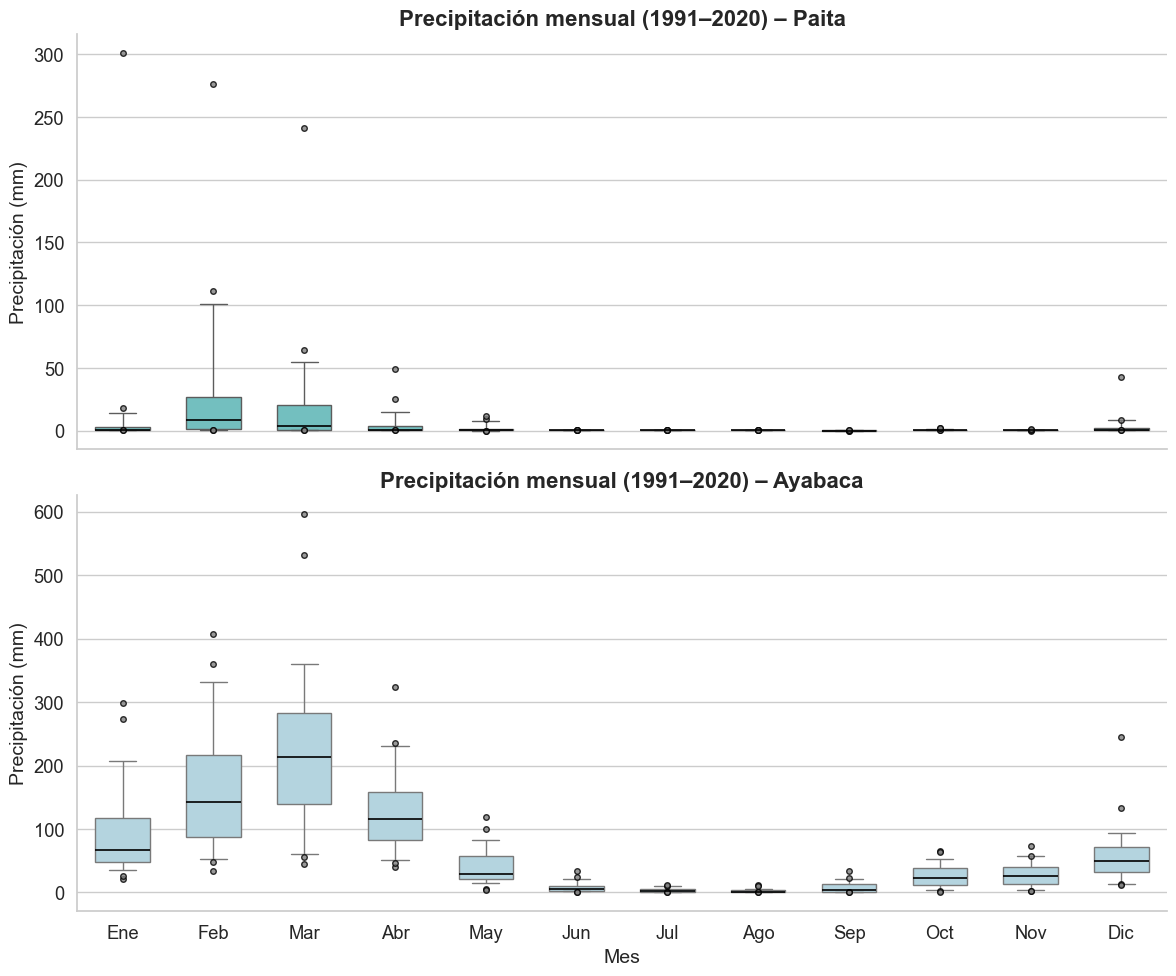

In [1]:
# Patron estacional de precipitación de Paita y Ayabaca 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Cargar shapefile de provincias
shp_peru = gpd.read_file(r"C:\Users\Elizabeth\SPI\Shape_prov\PROVINCIAS.shp")
shp_peru = shp_peru.to_crs("EPSG:4326")
#extraer provincias Paita y Ayabaca
provincias = ["PAITA", "AYABACA"]
shp_prov = shp_peru[shp_peru['NOMBPROV'].str.upper().isin(provincias)]

# Data de precipitación mensual(PISCO)
df = pd.read_csv(r"C:\Users\Elizabeth\SPI\PISCO_precip_1991_2020.csv")
df = df.rename(columns={'T': 'time', 'Y': 'lat', 'X': 'lon', 'precip_mm': 'precip'})
df['time'] = pd.to_datetime(df['time'])
# Convierte los datos PISCO a un geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']), crs="EPSG:4326")

# Filtrar puntos dentro de PAITA o AYABACA
gdf_prov = gpd.sjoin(gdf, shp_prov, predicate="intersects")
gdf_prov = gdf_prov.rename(columns={"NOMBPROV": "provincia"})

# Promedio espacial mensual por provincia
df_mean = gdf_prov.groupby(['time','provincia'])['precip'].mean().reset_index()

# Extraer mes y nombre del mes
meses = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
df_mean['month'] = df_mean['time'].dt.month
df_mean['month_name'] = df_mean['month'].apply(lambda x: meses[x-1])

# Separar provincias
df_paita = df_mean[df_mean["provincia"] == "PAITA"]
df_ayabaca = df_mean[df_mean["provincia"] == "AYABACA"]


# Ploteo
sns.set(style="whitegrid", font_scale=1.2)

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Boxplot: PAITA
sns.boxplot(
    x='month_name',
    y='precip',
    data=df_paita,
    ax=axes[0],
    color='#66CCCC',
    fliersize=2,
    linewidth=1,
    width=0.6,
    whis=[5,95],
    medianprops=dict(color='black', linewidth=1.2),
    flierprops=dict(marker='o',
                    markerfacecolor='grey',
                    markeredgecolor='black',
                    alpha=0.8,
                    markersize=4),
)

axes[0].set_title("Precipitación mensual (1991–2020) – Paita", fontsize=16, weight='bold')
axes[0].set_ylabel("Precipitación (mm)", fontsize=14)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Boxplot de AYABACA
sns.boxplot(
    x='month_name',
    y='precip',
    data=df_ayabaca,
    ax=axes[1],
    color='lightblue',
    fliersize=2,
    linewidth=1,
    width=0.6,
    whis=[5,95],
    medianprops=dict(color='black', linewidth=1.2),
    flierprops=dict(marker='o',
                    markerfacecolor='grey',
                    markeredgecolor='black',
                    alpha=0.8,
                    markersize=4),
)

axes[1].set_title("Precipitación mensual (1991–2020) – Ayabaca", fontsize=16, weight='bold')
axes[1].set_xlabel("Mes", fontsize=14)
axes[1].set_ylabel("Precipitación (mm)", fontsize=14)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
